In [64]:
# code for showing image to make a good note: 

import matplotlib.pyplot as plt 
import cv2 as cv 

def showImg(img):
    img = cv.imread(img)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img)
    pass

<br>

# `Tensorflow Input Pipeline: `

<br>

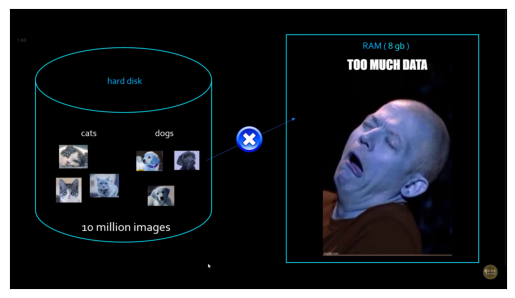

In [65]:
showImg("../note_image/pic30.png")

<br>

``
ধরি, আমরা `cats and dogs` classifier model বানাচ্ছি। এর জন্য আমাদের কাছে 10 million images আছে । আর সব গুলো আমাদের hard disk এ আছে । যখন, model train করার জন্য দিব, তখন সেইটাকে আমরা array তে convert করে নিব (like: X_train) । কিন্তু, আমরা এত গুলো ছবি আমাদের 8b ram এ Load করতে পারবো না । এর জন্য আমরা সব ছবি গুলো batch আকারে ভাগ করে দিতে পারি (The picture in the below) । 

<br>


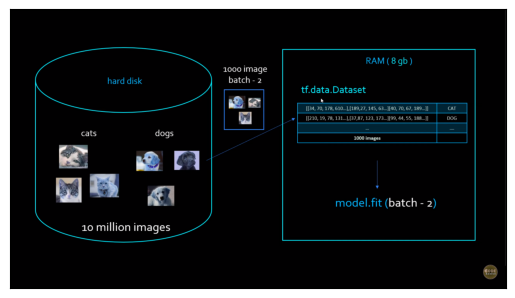

In [66]:
showImg("../note_image/pic26.png")

<br>

আমরা imgae কে array তে convert করি, এইটা হচ্ছে special ধরনের array, Numpy array নয় । এইটা হচ্ছে, `tf.data.Dataset()` ডাটা । ধরি, imgae কে আমরা batch-1, batch-2, batch-3 তে ভাগ করেছি এখন, এই গুলোকে model.fit(batch-1) then model.fit(batch-2) then model.fit(batch-3) দিয়ে model train করবো ।

<br>

`tf.data.Dataset আমাদের tensorflow pipeline create করে । `

<br>

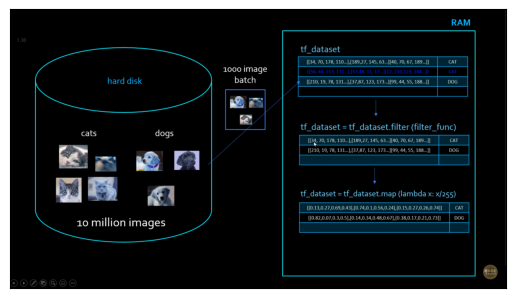

In [67]:
showImg("../note_image/pic27.png")

<br>

tf.data আমাদের কিছু api provide করে । যদি আমাদের কাছে কোন blurry imgae  থাকে তখন আমরা সেই কে filer  করতে পারি  by the hlep of tf.data's  api। Mainly, এই কাজ গুলো আমরা feature engineering এ করে থাকি । 

<br>

`উপরের ছবিতে আমরা, lambda function use করে scaling করেছি । `

<br>

<br>

# We can do all the things with a single line of code. Given below, 

<br>

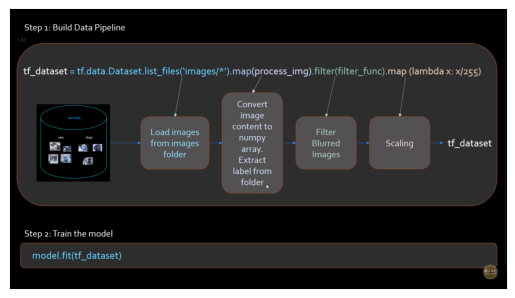

In [68]:
showImg("../note_image/pic28.png")

`The image above, is the tensorflow input pipeline. `


কিন্তু এই এ একটা সমস্যা আছে । প্রথমে আমাদের cpu data read করে । তারপর সেই কে কাছে  gpu কাছে পাঠীয়ে দেয় । অর্থাৎ যতক্ষন আমাদের cpu data read করে ততক্ষন আমাদের gpu অলস হয়ে বসে থাকে । আবার যখন, gpu  data read করে ততক্ষন আমাদের cpu অলস হয়ে বসে থাকে । ( **Like the image below: **)


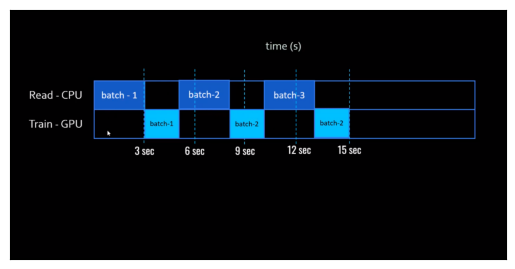

In [69]:
showImg("../note_image/pic31.png")

<br>

আমরা করতে পারি যে, cpu প্রথম batch-1 load করার পর  gpu এর কাছে পাঠায় এবং  যতক্ষন gpu তে প্রসেসিং চলতে থাকে ততক্ষন আমরা ইচ্ছে করে cpu কে দিয়ে অন্য এক বা একাধিক batch-1 load করাতে পারি ।  (like the image in below: ) 

<br>


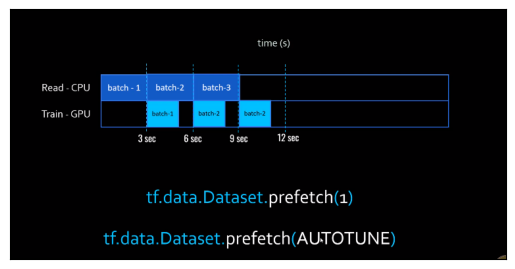

In [71]:
showImg("../note_image/pic32.png")


<br>

এখানে **tf.data.Dataset.prefetch(1)** মানে হচ্ছে, cpu প্রথম batch-1 load করার পর gpu এর কাছে পাঠায় এবং যতক্ষন gpu তে প্রসেসিং চলতে থাকে ততক্ষন আর একটা load করবে । যদি,  **tf.data.Dataset.prefetch(2)** হয় তাহলে 2টা batch load করবে । **tf.data.Dataset.prefetch(AUTOTUNE)** দিলে tensorflow framework তার নিজের মতো ঠিক করবে কয়টা batch  prefetch করবে ।

<br>


# `Now, optimam input pipeline will be like below:` 


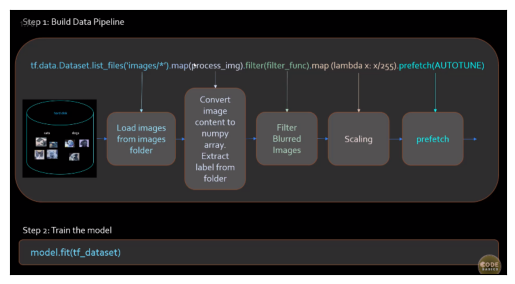

In [77]:
showImg("../note_image/pic34.png")

<br>

#  `More optimumization in, tensorflow input pipeline: `

<br>

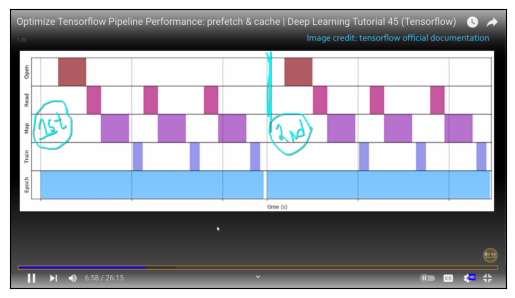

In [78]:
showImg("../note_image/pic35.png")

আমরা যখন ডাটা গুলোকে batch এ ভাগ করতেছি। তখন, 1st batch এর জন্য আমাদের ফাইলটি open হচ্ছে, তারপর সেখন থেকে image read হচ্ছে এরপর Map(filter,scaling etc.) হচ্ছে, এর পর train হচ্ছে ।  যখন, st batch এর ক্ষেত্রেও আমাদের ফাইলটি open হচ্ছে, তারপর সেখন থেকে image read হচ্ছে এরপর Map(filter,scaling etc.) হচ্ছে । কিন্তু আমরা যদি, `tf.data.Dataset.cache()` api ব্যবহার করি তাহলে, আমদের ফাইকে আর open করতে হবে না ।  (like the imgae below: )

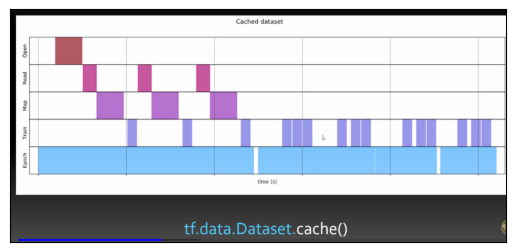

In [80]:
showImg("../note_image/pic36.png")